# Univariate Analysis
## Load files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSVs
circuits = pd.read_csv('circuits.csv')
print("Circuits Data:")
print(circuits.head(), "\n")

constructor_results = pd.read_csv('constructor_results.csv')
print("Constructor Results Data:")
print(constructor_results.head(), "\n")

constructor_standings = pd.read_csv('constructor_standings.csv')
print("Constructor Standings Data:")
print(constructor_standings.head(), "\n")

constructors = pd.read_csv('constructors.csv')
print("Constructors Data:")
print(constructors.head(), "\n")

driver_standings = pd.read_csv('driver_standings.csv')
print("Driver Standings Data:")
print(driver_standings.head(), "\n")

drivers = pd.read_csv('drivers.csv')
print("Drivers Data:")
print(drivers.head(), "\n")

lap_times = pd.read_csv('lap_times.csv')
print("Lap Times Data:")
print(lap_times.head(), "\n")

pit_stops = pd.read_csv('pit_stops.csv')
print("Pit Stops Data:")
print(pit_stops.head(), "\n")

qualifying = pd.read_csv('qualifying.csv')
print("Qualifying Data:")
print(qualifying.head(), "\n")

races = pd.read_csv('races.csv')
print("Races Data:")
print(races.head(), "\n")

results = pd.read_csv('results.csv')
print("Results Data:")
print(results.head(), "\n")

seasons = pd.read_csv('seasons.csv')
print("Seasons Data:")
print(seasons.head(), "\n")

sprint_results = pd.read_csv('sprint_results.csv')
print("Sprint Results Data:")
print(sprint_results.head(), "\n")

status = pd.read_csv('status.csv')
print("Status Data:")
print(status.head(), "\n")

Circuits Data:
   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4     

## Handle missing values
### Note taken: Only missing values in qualifying 2 and qualifying 3 which is to be expected

In [2]:
# Checking for missing values in each dataset
datasets = {
    'Circuits': circuits,
    'Constructor Results': constructor_results,
    'Constructor Standings': constructor_standings,
    'Constructors': constructors,
    'Driver Standings': driver_standings,
    'Drivers': drivers,
    'Lap Times': lap_times,
    'Pit Stops': pit_stops,
    'Qualifying': qualifying,
    'Races': races,
    'Results': results,
    'Seasons': seasons,
    'Sprint Results': sprint_results,
    'Status': status
}

for name, dataset in datasets.items():
    print(f"Missing values in {name}:")
    print(dataset.isnull().sum(), "\n")

Missing values in Circuits:
circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64 

Missing values in Constructor Results:
constructorResultsId    0
raceId                  0
constructorId           0
points                  0
status                  0
dtype: int64 

Missing values in Constructor Standings:
constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64 

Missing values in Constructors:
constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64 

Missing values in Driver Standings:
driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64 

Missing values in 

## Check for outliers in numerical columns
### Note taken: Useful plot for presentation - Altitude.

Outlier check for Circuits:


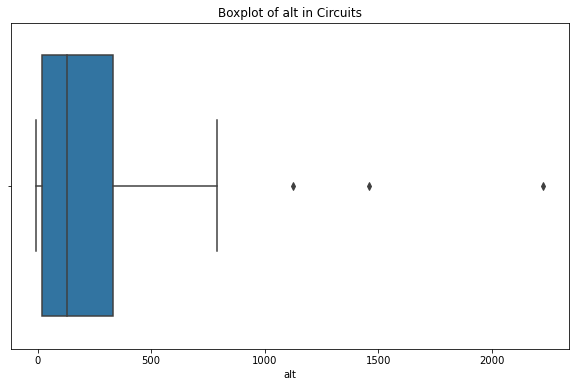

alt in Circuits has 3 potential outliers

Outlier check for Constructor Results:


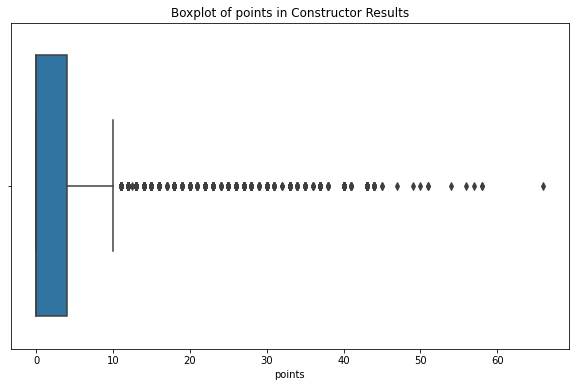

points in Constructor Results has 1367 potential outliers

Outlier check for Constructor Standings:


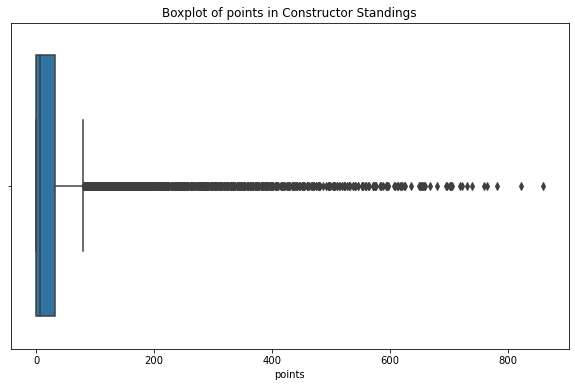

points in Constructor Standings has 1519 potential outliers

Outlier check for Driver Standings:


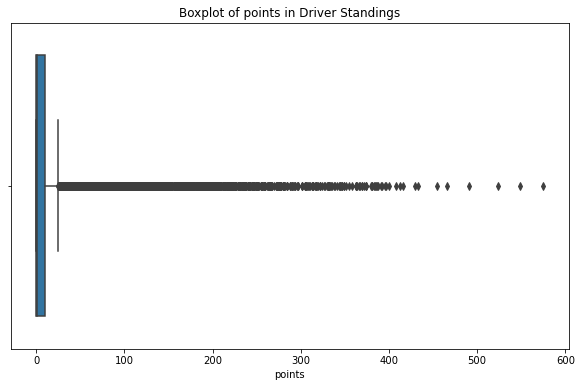

points in Driver Standings has 4824 potential outliers

Outlier check for Results:


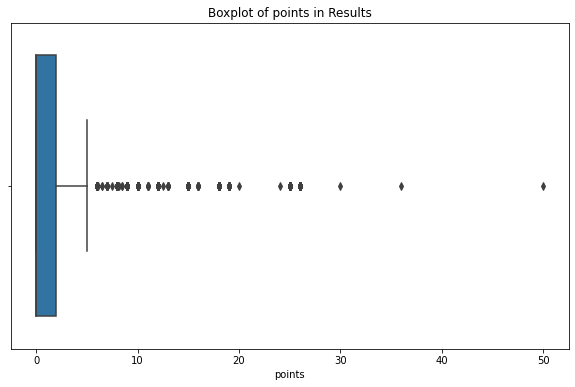

points in Results has 3789 potential outliers

Outlier check for Sprint Results:


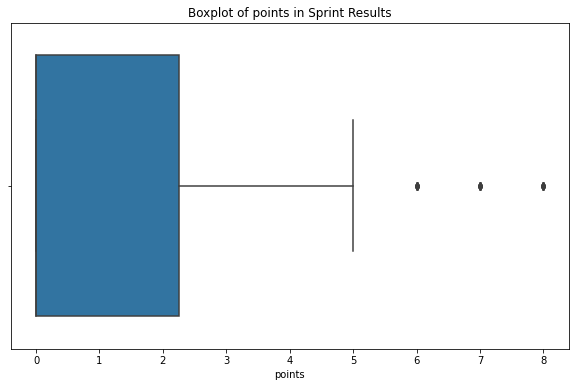

points in Sprint Results has 36 potential outliers



In [3]:
# Defining the specific columns to check for outliers in each dataset
columns_to_check = {
    'Circuits': ['alt'],
    'Constructor Results': ['points'],
    'Constructor Standings': ['points'],
    'Driver Standings': ['points'],
    'Results': ['points'],
    'Sprint Results': ['points']
}

# Function to check for outliers using boxplots and IQR method
def check_numerical_outliers(data, dataset_name, columns):
    for col in columns:
        if col in data.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=data[col])
            plt.title(f'Boxplot of {col} in {dataset_name}')
            plt.show()

            # Detecting outliers using IQR method
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Displaying the number of outliers
            outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
            print(f"{col} in {dataset_name} has {len(outliers)} potential outliers\n")

# Apply outlier detection on specified columns
for name, dataset in datasets.items():
    if name in columns_to_check:
        print(f"Outlier check for {name}:")
        check_numerical_outliers(dataset, name, columns_to_check[name])

## Checking distribution of columns
### Note taken: Useful plots for presentation: country in circuits, latitude in circuits, altitude in circuits, nationality in constructors, nationality in drivers, lap in pit stops, fastest lap in sprint results

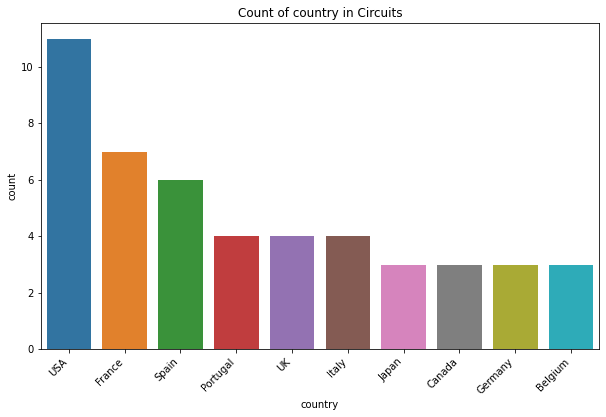

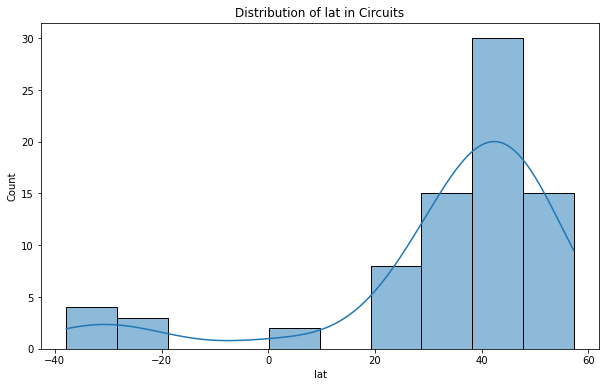

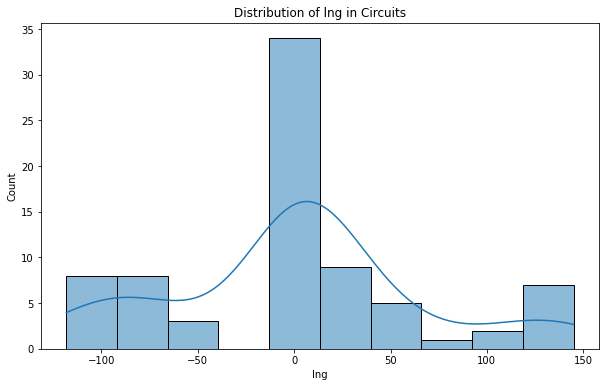

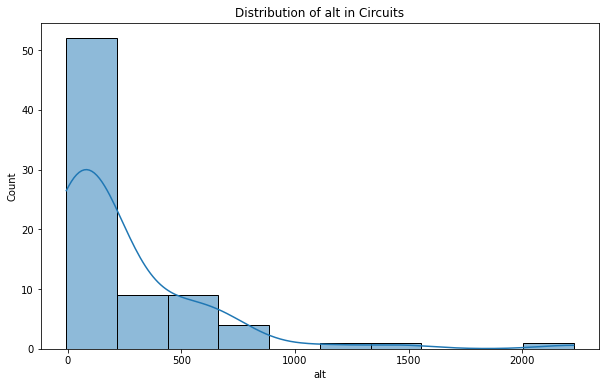

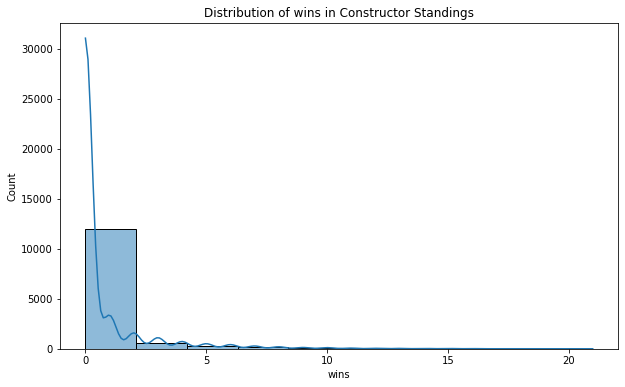

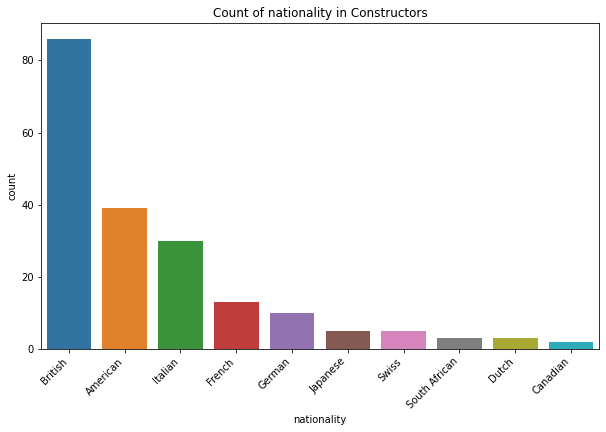

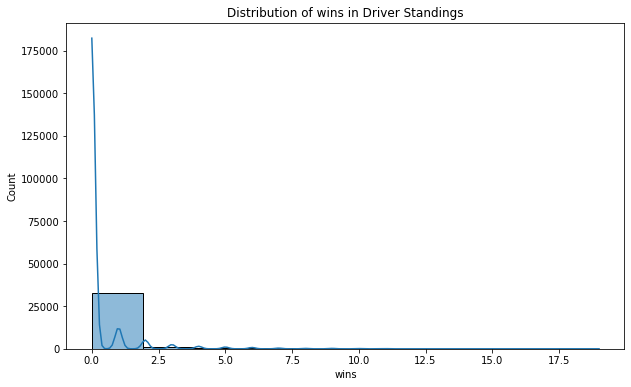

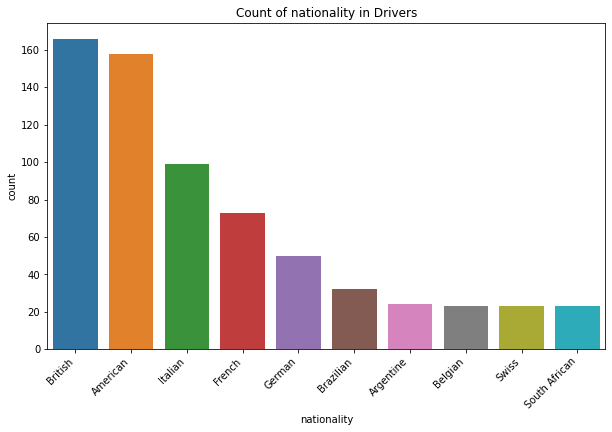

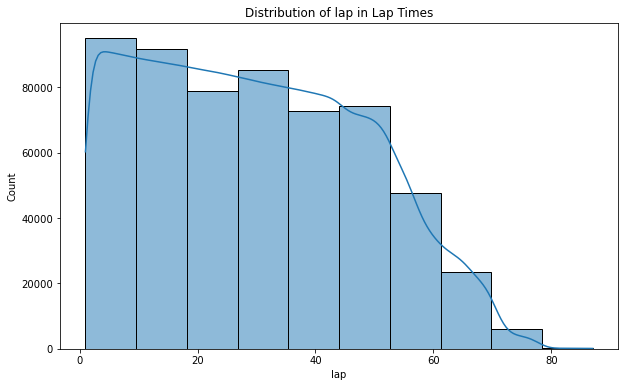

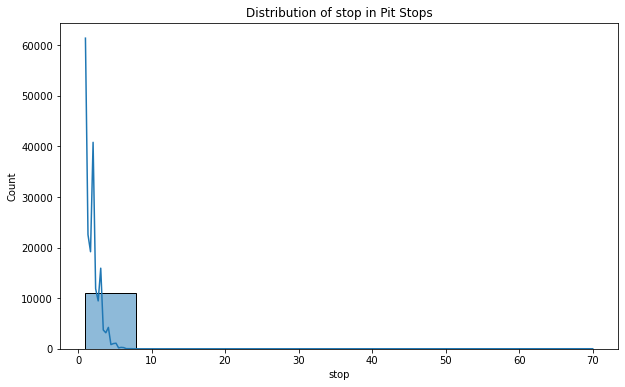

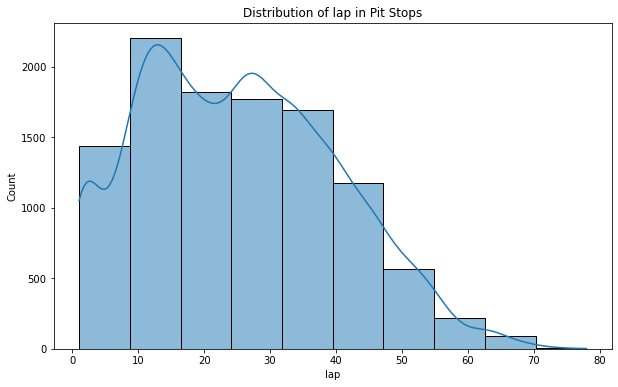

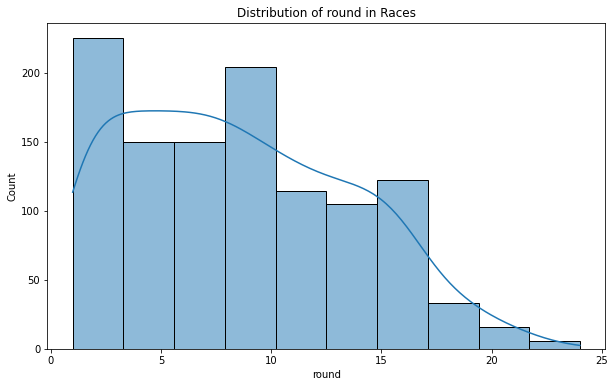

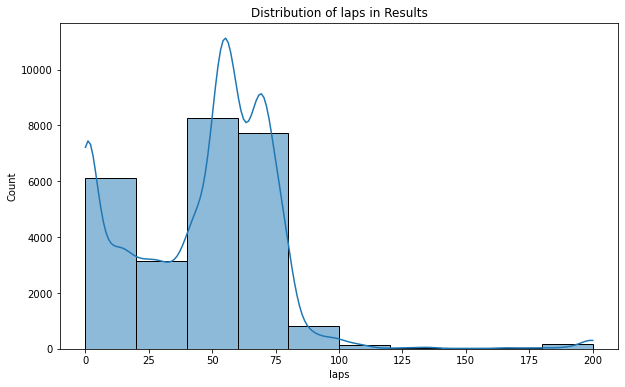

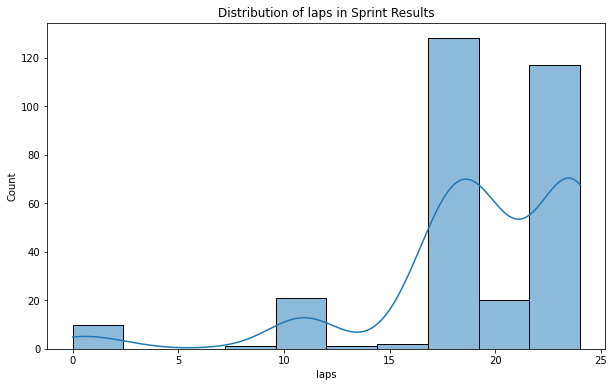

In [15]:
def check_distribution(data, dataset_name, ignore_columns=None):
    # Ensure the ignore_columns list is not None
    if ignore_columns is None:
        ignore_columns = []

    # Loop through each column in the dataset, skipping columns in the ignore list
    for col in data.columns:
        if any(ignored in col.lower() for ignored in ignore_columns):
            continue

        if data[col].dtype == 'object' or data[col].dtype == 'category':
            plt.figure(figsize=(10, 6))
            top_10_values = data[col].value_counts().nlargest(10).index
            sns.countplot(x=data[col], order=top_10_values)
            plt.title(f'Count of {col} in {dataset_name}')
            plt.xticks(rotation=45, ha='right')
            plt.show()
        
        elif data[col].dtype in ['int64', 'float64']:
            plt.figure(figsize=(10, 6))
            sns.histplot(data[col], kde=True, bins=10)
            plt.title(f'Distribution of {col} in {dataset_name}')
            plt.show()

# list of substrings to ignore
ignore_list = ['id', 'url', 'code','name', 'ref','status','text','points',
              'number','dob', 'milliseconds','duration','q1','q2','q3',
               'order','time','date','year','position','fast','location','rank']

# Apply the distribution check to each dataset
for name, dataset in datasets.items():
    check_distribution(dataset, name, ignore_columns=ignore_list)

# Multivariate analysis
## Merging the data for correlation matrix
## Merging drivers with results

In [5]:
drivers = drivers.rename(columns={'nationality': 'drivers_nationality'})
drivers = drivers.rename(columns={'dob': 'driver_dob'})
drivers = drivers.rename(columns={'forename': 'driver_name'})
drivers = drivers.rename(columns={'surname': 'driver_surname'})
results = results.rename(columns={'grid': 'race_grid'})
results = results.rename(columns={'position': 'final_position'})

# Merge Results with Drivers based on common keys
merged_df = pd.merge(results[['raceId', 'driverId', 'constructorId', 'race_grid', 'final_position', 'points']], 
                     drivers[['driverId', 'driver_name', 'driver_surname', 'driver_dob', 'drivers_nationality']], 
                     on='driverId', 
                     how='left')
# Display the merged dataframe
print(merged_df.head())

   raceId  driverId  constructorId  race_grid final_position  points  \
0      18         1              1          1              1    10.0   
1      18         2              2          5              2     8.0   
2      18         3              3          7              3     6.0   
3      18         4              4         11              4     5.0   
4      18         5              1          3              5     4.0   

  driver_name driver_surname  driver_dob drivers_nationality  
0       Lewis       Hamilton  1985-01-07             British  
1        Nick       Heidfeld  1977-05-10              German  
2        Nico        Rosberg  1985-06-27              German  
3    Fernando         Alonso  1981-07-29             Spanish  
4      Heikki     Kovalainen  1981-10-19             Finnish  


## Merging with constructors

In [6]:
constructors = constructors.rename(columns={'nationality': 'constructors_nationality'})
constructors = constructors.rename(columns={'name': 'constructors_name'})

merged_df = pd.merge(merged_df, constructors[['constructorId', 'constructors_name', 'constructors_nationality']], 
                     on='constructorId', 
                     how='left')
# Display the merged dataframe
print(merged_df.head())

   raceId  driverId  constructorId  race_grid final_position  points  \
0      18         1              1          1              1    10.0   
1      18         2              2          5              2     8.0   
2      18         3              3          7              3     6.0   
3      18         4              4         11              4     5.0   
4      18         5              1          3              5     4.0   

  driver_name driver_surname  driver_dob drivers_nationality  \
0       Lewis       Hamilton  1985-01-07             British   
1        Nick       Heidfeld  1977-05-10              German   
2        Nico        Rosberg  1985-06-27              German   
3    Fernando         Alonso  1981-07-29             Spanish   
4      Heikki     Kovalainen  1981-10-19             Finnish   

  constructors_name constructors_nationality  
0           McLaren                  British  
1        BMW Sauber                   German  
2          Williams                  Brit

## Merging with races

In [7]:
merged_df = pd.merge(merged_df, races[['raceId', 'year', 'round', 'circuitId', 'date']], 
                     on='raceId', 
                     how='left')
# Display the merged dataframe
print(merged_df.head())

   raceId  driverId  constructorId  race_grid final_position  points  \
0      18         1              1          1              1    10.0   
1      18         2              2          5              2     8.0   
2      18         3              3          7              3     6.0   
3      18         4              4         11              4     5.0   
4      18         5              1          3              5     4.0   

  driver_name driver_surname  driver_dob drivers_nationality  \
0       Lewis       Hamilton  1985-01-07             British   
1        Nick       Heidfeld  1977-05-10              German   
2        Nico        Rosberg  1985-06-27              German   
3    Fernando         Alonso  1981-07-29             Spanish   
4      Heikki     Kovalainen  1981-10-19             Finnish   

  constructors_name constructors_nationality  year  round  circuitId  \
0           McLaren                  British  2008      1          1   
1        BMW Sauber                   

## Merging with lap_times

In [8]:
lap_times = lap_times.rename(columns={'lap': 'lap_number'})
lap_times = lap_times.rename(columns={'milliseconds': 'lap_milliseconds'})

# Merge with lap times based on raceId and driverId
merged_df = pd.merge(merged_df, lap_times[['raceId', 'driverId', 'lap_number', 'lap_milliseconds']], 
                     on=['raceId', 'driverId'], 
                     how='left')
# Display the merged dataframe
print(merged_df.head())

   raceId  driverId  constructorId  race_grid final_position  points  \
0      18         1              1          1              1    10.0   
1      18         1              1          1              1    10.0   
2      18         1              1          1              1    10.0   
3      18         1              1          1              1    10.0   
4      18         1              1          1              1    10.0   

  driver_name driver_surname  driver_dob drivers_nationality  \
0       Lewis       Hamilton  1985-01-07             British   
1       Lewis       Hamilton  1985-01-07             British   
2       Lewis       Hamilton  1985-01-07             British   
3       Lewis       Hamilton  1985-01-07             British   
4       Lewis       Hamilton  1985-01-07             British   

  constructors_name constructors_nationality  year  round  circuitId  \
0           McLaren                  British  2008      1          1   
1           McLaren                  B

## Merging with qualifying

In [9]:
qualifying = qualifying.rename(columns={'position': 'qualifying_position'})

# Merge with Qualifying results
merged_df = pd.merge(merged_df, qualifying[['raceId', 'driverId','qualifying_position', 'q1', 'q2', 'q3']], 
                     on=['raceId', 'driverId'], 
                     how='left')
# Display the merged dataframe
print(merged_df.head())

   raceId  driverId  constructorId  race_grid final_position  points  \
0      18         1              1          1              1    10.0   
1      18         1              1          1              1    10.0   
2      18         1              1          1              1    10.0   
3      18         1              1          1              1    10.0   
4      18         1              1          1              1    10.0   

  driver_name driver_surname  driver_dob drivers_nationality  ...  year round  \
0       Lewis       Hamilton  1985-01-07             British  ...  2008     1   
1       Lewis       Hamilton  1985-01-07             British  ...  2008     1   
2       Lewis       Hamilton  1985-01-07             British  ...  2008     1   
3       Lewis       Hamilton  1985-01-07             British  ...  2008     1   
4       Lewis       Hamilton  1985-01-07             British  ...  2008     1   

   circuitId        date  lap_number lap_milliseconds  qualifying_position  \
0 

## Merging with pit_stops

In [10]:
pit_stops = pit_stops.rename(columns={'lap': 'pit_lap'})
pit_stops = pit_stops.rename(columns={'duration': 'pit_duration'})

merged_df = pd.merge(merged_df, pit_stops[['raceId', 'driverId', 'pit_lap', 'pit_duration']], 
                     on=['raceId', 'driverId'], 
                     how='left')
# Display the merged dataframe
print(merged_df.head())

   raceId  driverId  constructorId  race_grid final_position  points  \
0      18         1              1          1              1    10.0   
1      18         1              1          1              1    10.0   
2      18         1              1          1              1    10.0   
3      18         1              1          1              1    10.0   
4      18         1              1          1              1    10.0   

  driver_name driver_surname  driver_dob drivers_nationality  ... circuitId  \
0       Lewis       Hamilton  1985-01-07             British  ...         1   
1       Lewis       Hamilton  1985-01-07             British  ...         1   
2       Lewis       Hamilton  1985-01-07             British  ...         1   
3       Lewis       Hamilton  1985-01-07             British  ...         1   
4       Lewis       Hamilton  1985-01-07             British  ...         1   

         date  lap_number  lap_milliseconds  qualifying_position        q1  \
0  2008-03-16 

## Some data cleaning for correlation matrix
## Convert time columns to milliseconds

In [11]:
# Function to convert time string (e.g., '1:26.572') to milliseconds
def time_to_milliseconds(t):
    if pd.isna(t) or isinstance(t, float):  # Handle NaN or already numeric values
        return None
    if ':' in t:  # Process valid time strings
        try:
            minutes, seconds = t.split(':')
            total_milliseconds = (int(minutes) * 60 + float(seconds)) * 1000
            return total_milliseconds
        except ValueError:
            return None  # Handle cases where the time format is not as expected
    return None

# Apply the conversion to q1, q2, q3, duration columns
merged_df['q1_milliseconds'] = merged_df['q1'].apply(time_to_milliseconds)
merged_df['q2_milliseconds'] = merged_df['q2'].apply(time_to_milliseconds)
merged_df['q3_milliseconds'] = merged_df['q3'].apply(time_to_milliseconds)
merged_df['pit_duration'] = merged_df['pit_duration'].apply(time_to_milliseconds)

# Drop the old q1, q2, q3 columns
merged_df = merged_df.drop(columns=['q1', 'q2', 'q3'])

# Display the updated dataframe
print(merged_df.head())

   raceId  driverId  constructorId  race_grid final_position  points  \
0      18         1              1          1              1    10.0   
1      18         1              1          1              1    10.0   
2      18         1              1          1              1    10.0   
3      18         1              1          1              1    10.0   
4      18         1              1          1              1    10.0   

  driver_name driver_surname  driver_dob drivers_nationality  ... circuitId  \
0       Lewis       Hamilton  1985-01-07             British  ...         1   
1       Lewis       Hamilton  1985-01-07             British  ...         1   
2       Lewis       Hamilton  1985-01-07             British  ...         1   
3       Lewis       Hamilton  1985-01-07             British  ...         1   
4       Lewis       Hamilton  1985-01-07             British  ...         1   

         date  lap_number  lap_milliseconds  qualifying_position pit_lap  \
0  2008-03-16   

## Handling placeholders in position column

In [12]:
# Replace '\\N' and other non-numeric values with NaN
merged_df['final_position'] = pd.to_numeric(merged_df['final_position'], errors='coerce')

## Correlation matrix(finally)

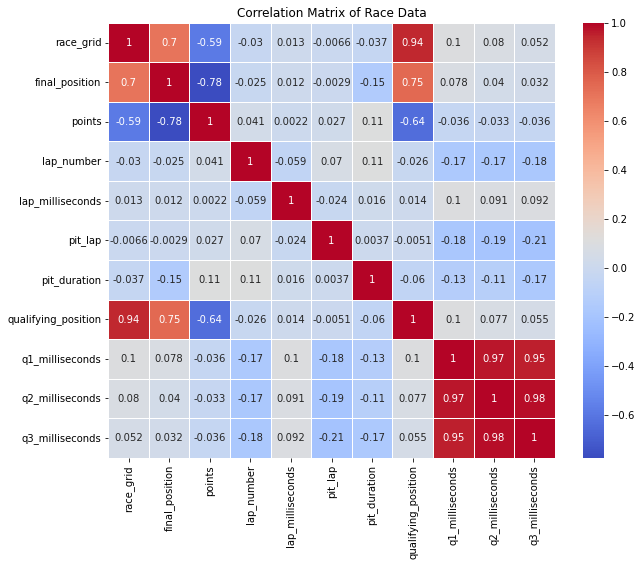

In [13]:
from sklearn.preprocessing import StandardScaler

# Select only the numerical columns for correlation
numerical_columns = [
    'race_grid', 'final_position', 'points', 'lap_number', 'lap_milliseconds',
    'pit_lap', 'pit_duration', 'qualifying_position', 'q1_milliseconds', 'q2_milliseconds', 'q3_milliseconds'
]

# Create a new df with only the numerical columns
numerical_data = merged_df[numerical_columns]

# Initialize the StandardScaler to normalize the data
scaler = StandardScaler()

# Fit the scaler and transform the numerical data
numerical_data_normalized = scaler.fit_transform(numerical_data)

# Convert the normalized array back into a df with the same column names
normalized_df = pd.DataFrame(numerical_data_normalized, columns=numerical_columns)

# Calculate the correlation matrix on the normalized data
correlation_matrix = normalized_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Race Data')
plt.show()
